## AI dataset healthcare

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Zorg dat plots mooi worden weergegeven
%matplotlib inline
sns.set_style('whitegrid')

df = pd.read_csv(r"C:\Users\Guzma\Desktop\data analyst\projects\Healthcare-AI-analysis\data\raw\Healthcare_Dataset.csv")


# Eerste check
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Age                 1000000 non-null  int64  
 1   Gender              1000000 non-null  object 
 2   Blood Type          1000000 non-null  object 
 3   Medical Condition   1000000 non-null  object 
 4   Date of Admission   1000000 non-null  object 
 5   Insurance Provider  1000000 non-null  object 
 6   Billing Amount      1000000 non-null  float64
 7   Room Number         1000000 non-null  int64  
 8   Admission Type      1000000 non-null  object 
 9   Discharge Date      1000000 non-null  object 
 10  Test Results        1000000 non-null  object 
 11  Admission Year      1000000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 91.6+ MB


,Age,Billing Amount,Room Number,Admission Year
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.384182,25452.547540,299.842601,2021.343587
std,17.214111,15699.833002,115.182699,1.491356
min,13.000000,0.030000,101.000000,2019.000000
25%,38.000000,11669.847500,200.000000,2020.000000
50%,50.000000,25376.960000,300.000000,2021.000000
75%,63.000000,39094.347500,400.000000,2023.000000
max,88.000000,52764.180000,499.000000,2024.000000


In [8]:
# Bekijk de eerste 5 rijen
df.head()

# Basisinfo over kolommen en types
df.info()

# Statistische samenvatting van numerieke kolommen
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Age                 1000000 non-null  int64  
 1   Gender              1000000 non-null  object 
 2   Blood Type          1000000 non-null  object 
 3   Medical Condition   1000000 non-null  object 
 4   Date of Admission   1000000 non-null  object 
 5   Insurance Provider  1000000 non-null  object 
 6   Billing Amount      1000000 non-null  float64
 7   Room Number         1000000 non-null  int64  
 8   Admission Type      1000000 non-null  object 
 9   Discharge Date      1000000 non-null  object 
 10  Test Results        1000000 non-null  object 
 11  Admission Year      1000000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 91.6+ MB


,Age,Billing Amount,Room Number,Admission Year
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.384182,25452.547540,299.842601,2021.343587
std,17.214111,15699.833002,115.182699,1.491356
min,13.000000,0.030000,101.000000,2019.000000
25%,38.000000,11669.847500,200.000000,2020.000000
50%,50.000000,25376.960000,300.000000,2021.000000
75%,63.000000,39094.347500,400.000000,2023.000000
max,88.000000,52764.180000,499.000000,2024.000000


In [9]:
df.isnull().sum()



Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Test Results          0
Admission Year        0
dtype: int64

In [11]:
# Gemiddelde leeftijd per geslacht
df.groupby('Gender')['Age'].mean()


Gender
Female    50.408526
Male      50.359991
Name: Age, dtype: float64

In [12]:
df['Medical Condition'].value_counts()


Medical Condition
Diabetes        168200
Arthritis       167616
Hypertension    166444
Cancer          166222
Obesity         165882
Asthma          165636
Name: count, dtype: int64

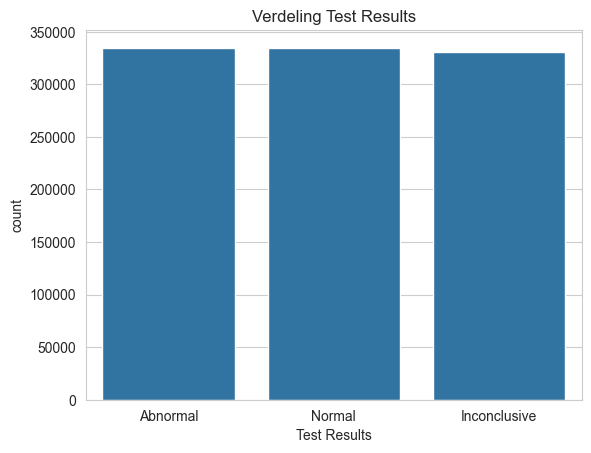

In [13]:
sns.countplot(x='Test Results', data=df)
plt.title('Verdeling Test Results')
plt.show()


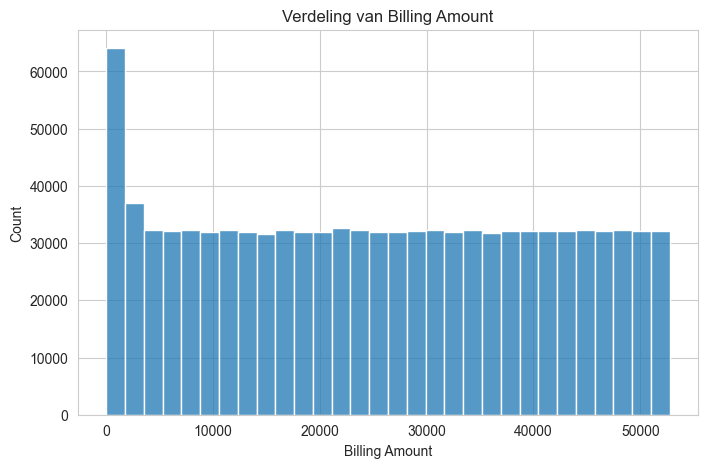

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Billing Amount'], bins=30)
plt.title('Verdeling van Billing Amount')
plt.show()


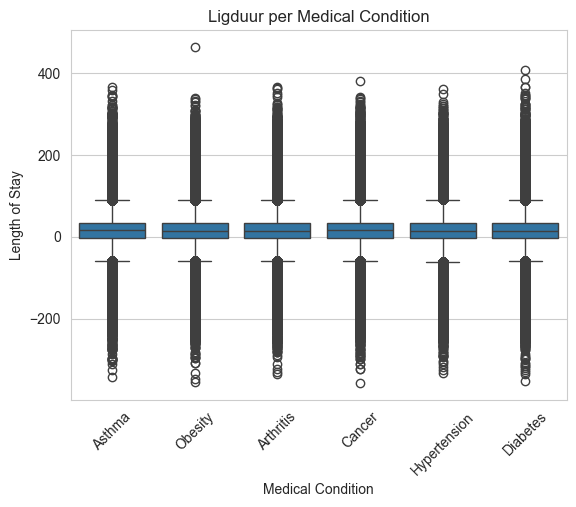

In [15]:
# Eerst datum kolommen naar datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Bereken ligduur in dagen
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

sns.boxplot(x='Medical Condition', y='Length of Stay', data=df)
plt.title('Ligduur per Medical Condition')
plt.xticks(rotation=45)
plt.show()


   Age  Gender Blood Type Medical Condition Date of Admission  \
0   52  Female         O+            Asthma        2021-04-02   
1   56    Male         O+           Obesity        2020-03-31   
2   74  Female         B-         Arthritis        2020-08-25   
3   86    Male         O-            Cancer        2024-01-14   
4   60    Male         A-           Obesity        2022-07-14   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0              Cigna        17895.23          369       Elective   
1              Aetna        33399.51          162      Emergency   
2         Blue Cross        21886.40          372       Elective   
3   UnitedHealthcare        45417.88          410         Urgent   
4              Aetna        49467.81          130      Emergency   

  Discharge Date Test Results  Admission Year  
0     2021-04-22     Abnormal            2021  
1     2020-03-25     Abnormal            2020  
2     2020-09-10       Normal            2020  
3     20

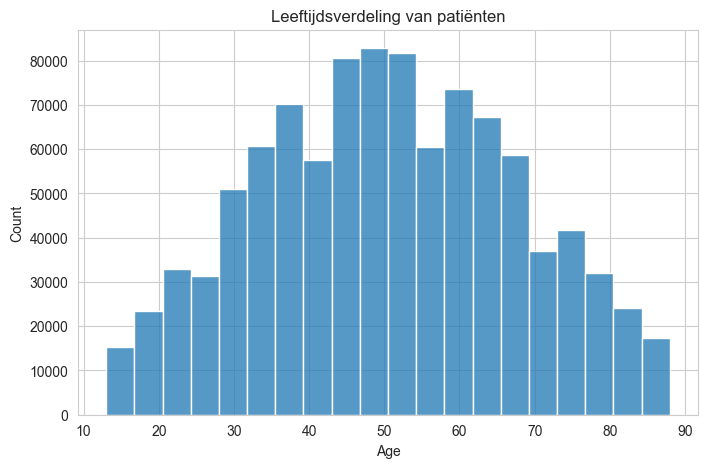

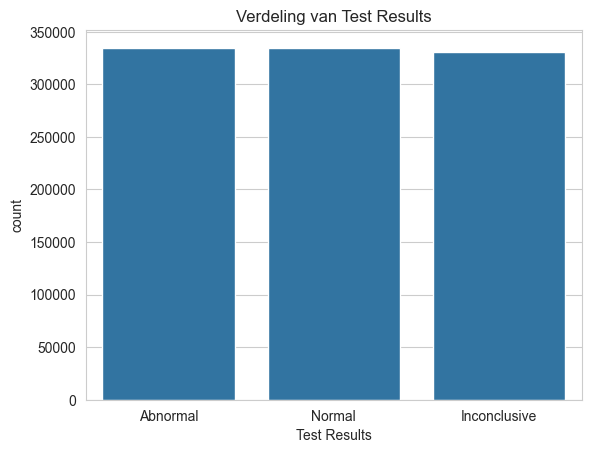

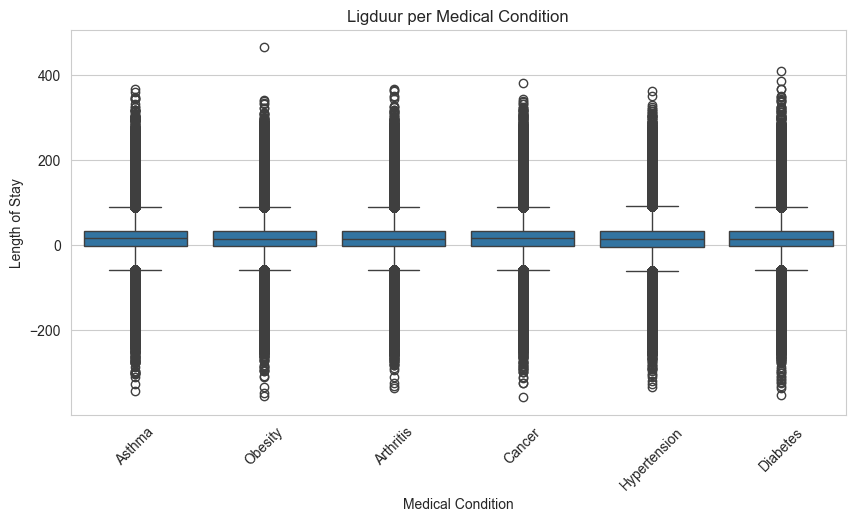

Insurance Provider
Medicare            25479.358612
Aetna               25470.800460
Cigna               25468.267486
Blue Cross          25460.342590
UnitedHealthcare    25384.193399
Name: Billing Amount, dtype: float64


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
%matplotlib inline
sns.set_style('whitegrid')

# Data inladen
df = pd.read_csv(r"C:\Users\Guzma\Desktop\data analyst\projects\Healthcare-AI-analysis\data\raw\Healthcare_Dataset.csv")

# Eerste check
print(df.head())
print(df.info())
print(df.describe())

# Datum kolommen naar datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Ligduur berekenen
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Leeftijdsverdeling
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20)
plt.title('Leeftijdsverdeling van patiënten')
plt.show()

# Test Results verdeling
sns.countplot(x='Test Results', data=df)
plt.title('Verdeling van Test Results')
plt.show()

# Ligduur per Medical Condition
plt.figure(figsize=(10,5))
sns.boxplot(x='Medical Condition', y='Length of Stay', data=df)
plt.xticks(rotation=45)
plt.title('Ligduur per Medical Condition')
plt.show()

# Gemiddelde billing amount per insurance provider
billing_mean = df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False)
print(billing_mean)


Gender
Male      501574
Female    498426
Name: count, dtype: int64


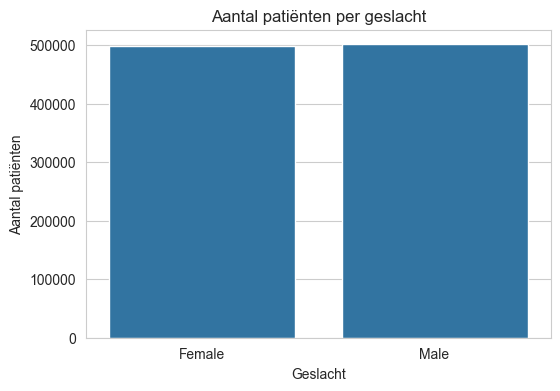

In [17]:
# Aantal patiënten per geslacht
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Plotten
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Aantal patiënten per geslacht')
plt.xlabel('Geslacht')
plt.ylabel('Aantal patiënten')
plt.show()


Gender
Male      50.1574
Female    49.8426
Name: proportion, dtype: float64


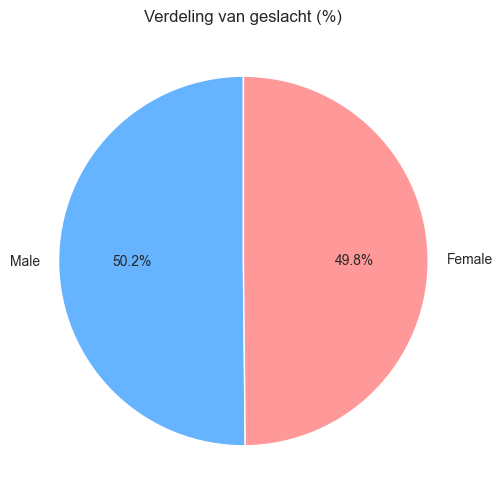

In [18]:
# Percentage
gender_percent = df['Gender'].value_counts(normalize=True) * 100
print(gender_percent)

# Taartdiagram
plt.figure(figsize=(6,6))
plt.pie(gender_percent, labels=gender_percent.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Verdeling van geslacht (%)')
plt.show()
